In [20]:
'''importing the required libraries'''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# # Comment this if the data visualisations doesn't work on your side
# %matplotlib inline
# #plt.style.use('bmh')

# '''Importing the dataset and checking its properties '''
# df =  pd.read_csv("Money_laundry_dataset.csv")

# print(len(df))


# Convert the Excel file (xlsx) to CSV
# excel_file = "data.xlsx"  # Replace with the path to your Excel file
# csv_file = "data.csv"      # Replace with the desired CSV file path

# Load the Excel file into a DataFrame
df = pd.read_csv("data.csv")

# Save the DataFrame as a CSV file
# df.to_csv(csv_file, index=False)   # Set index=False to omit row numbers in the CSV

# Now, you can use the CSV file in your ML program



In [22]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,0,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,1,1
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,1,1
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,1,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            1576 non-null   int64  
 1   type            1576 non-null   object 
 2   amount          1576 non-null   float64
 3   nameOrig        1576 non-null   object 
 4   oldbalanceOrg   1576 non-null   float64
 5   newbalanceOrig  1576 non-null   float64
 6   nameDest        1576 non-null   object 
 7   oldbalanceDest  1576 non-null   float64
 8   newbalanceDest  1576 non-null   float64
 9   isFraud         1576 non-null   int64  
 10  isFlaggedFraud  1576 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 135.6+ KB


In [26]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1576.0,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1.576000e+03,1576.000000,1576.000000
mean,1.0,1.113401e+05,8.351834e+05,8.527772e+05,6.254371e+05,1.029165e+06,0.107868,0.107868
std,0.0,2.563897e+05,2.056686e+06,2.102267e+06,1.948321e+06,3.053072e+06,0.310312,0.310312
min,1.0,8.730000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.0,3.873352e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,1.0,1.063762e+04,1.945700e+04,9.440420e+03,9.650000e+02,0.000000e+00,0.000000,0.000000
75%,1.0,1.279290e+05,1.067430e+05,1.018195e+05,3.777521e+05,3.535326e+05,0.000000,0.000000
max,1.0,3.776389e+06,1.010284e+07,1.024625e+07,1.941527e+07,1.916920e+07,1.000000,1.000000


In [28]:
'''Checking for any null values'''
print('Null Values =',df.isnull().values.any())

Null Values = False


In [40]:
'''removing the unwanted features'''
df.drop('name0rig', axis=1, inplace=True)
df.drop('nameDest', axis=1, inplace=True)
df.drop('isFlaggedFraud', axis=1, inplace=True)

isFraud
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

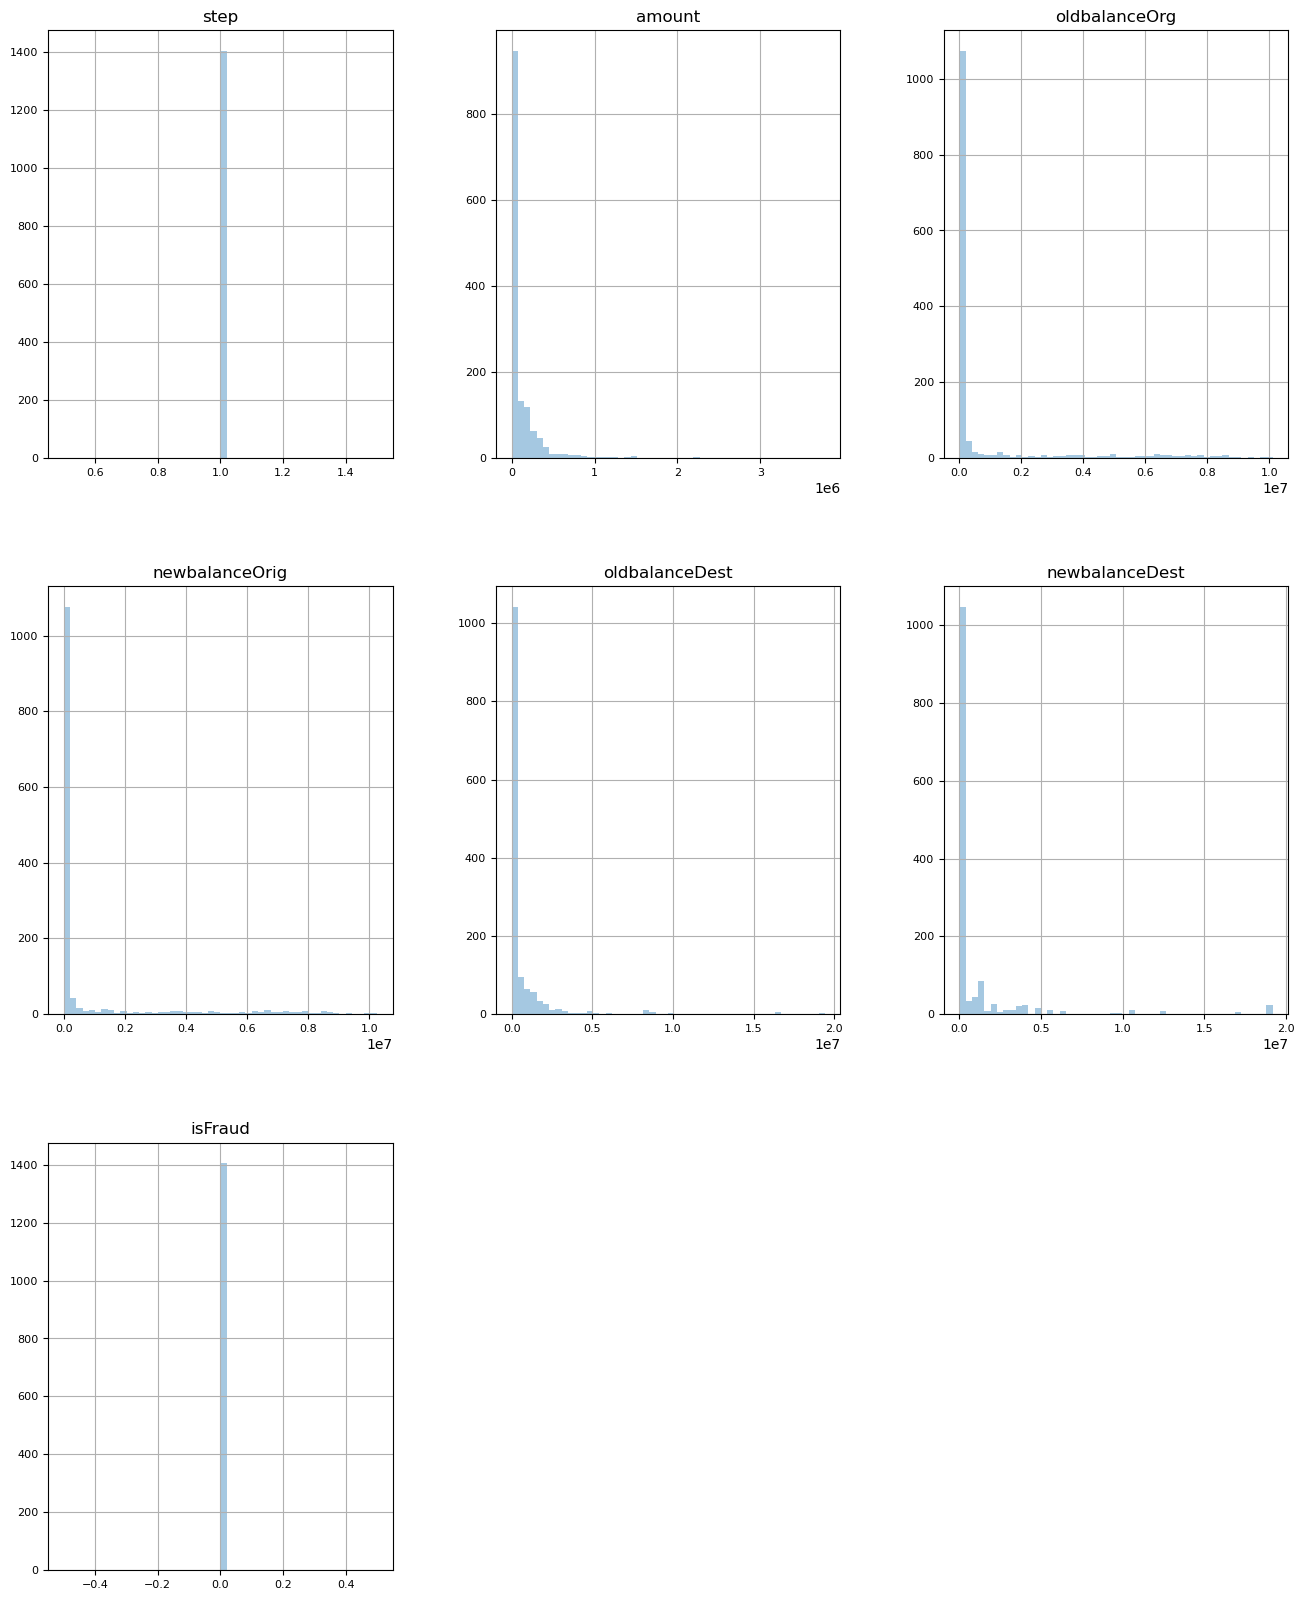

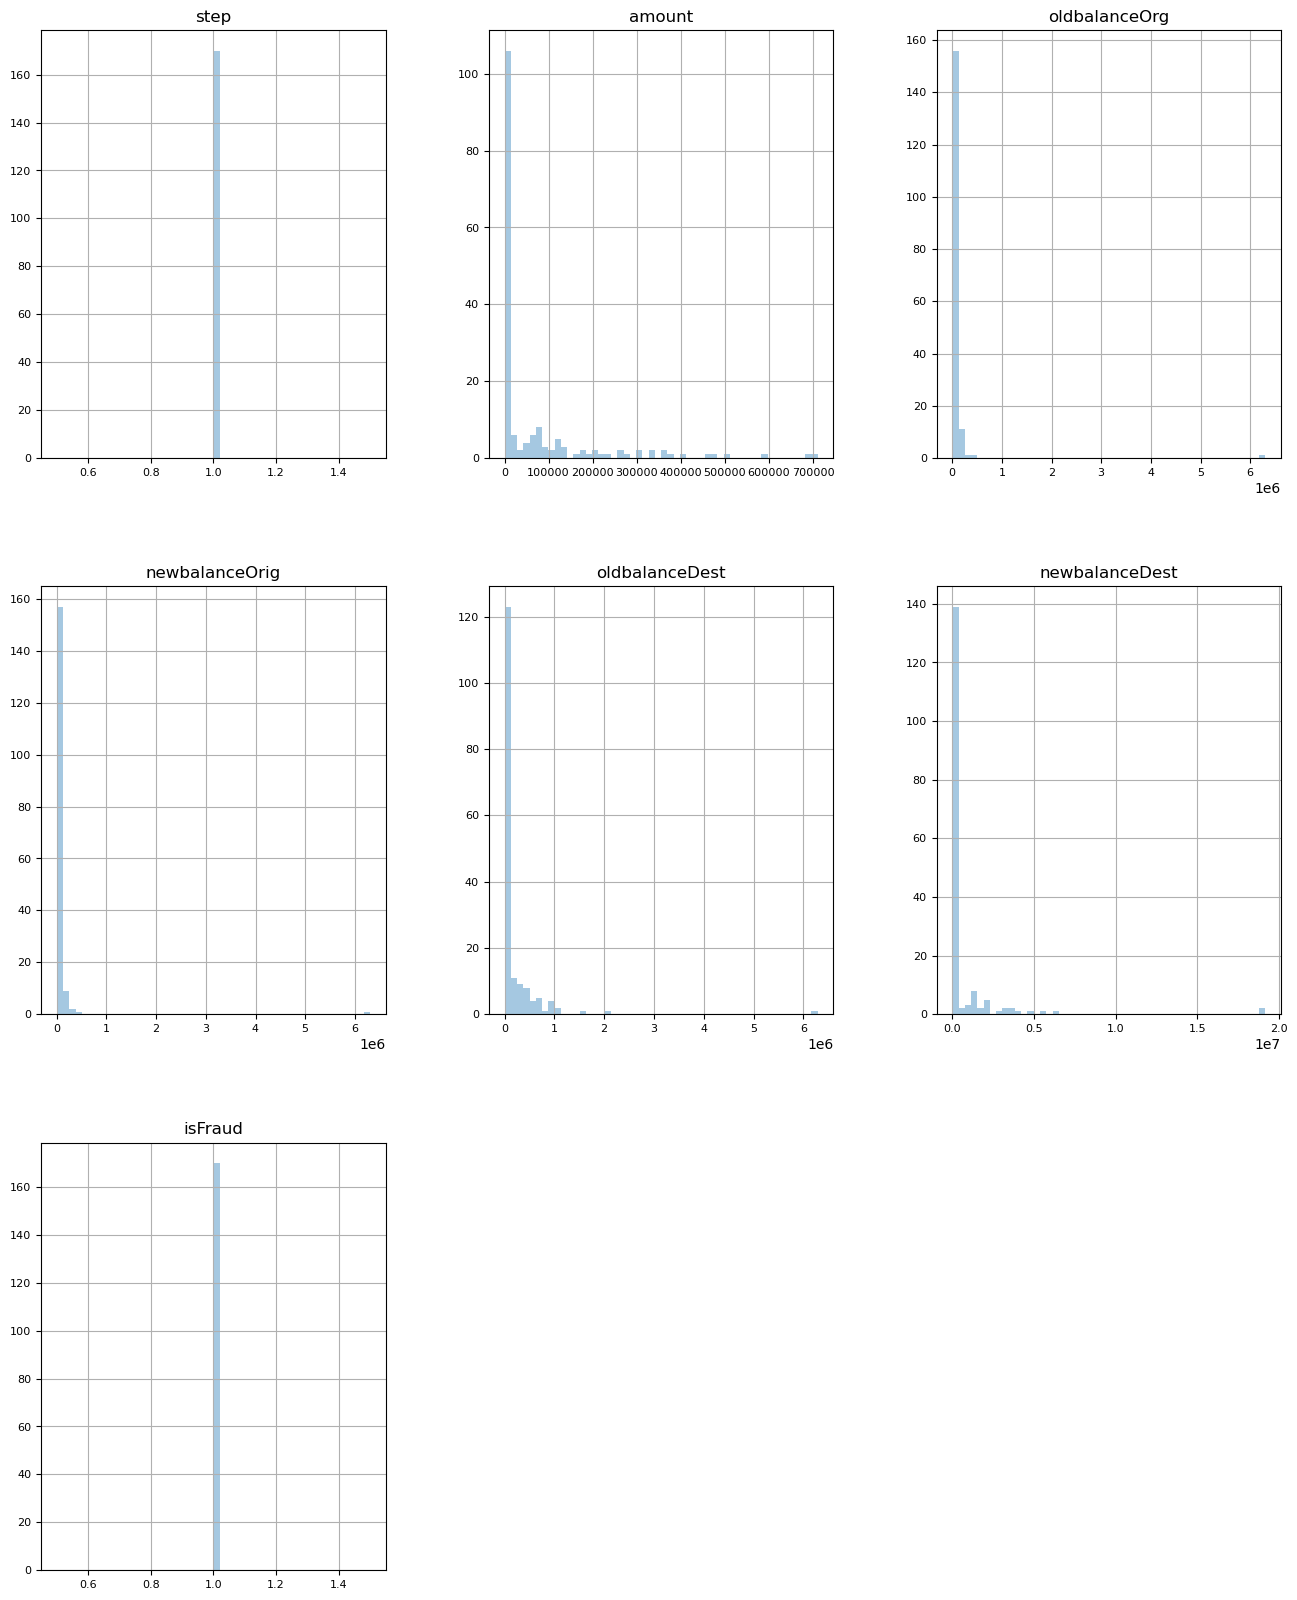

In [36]:
''' Visualising the variables by grouping them by class '''
df.groupby('isFraud').hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8,alpha=0.4)

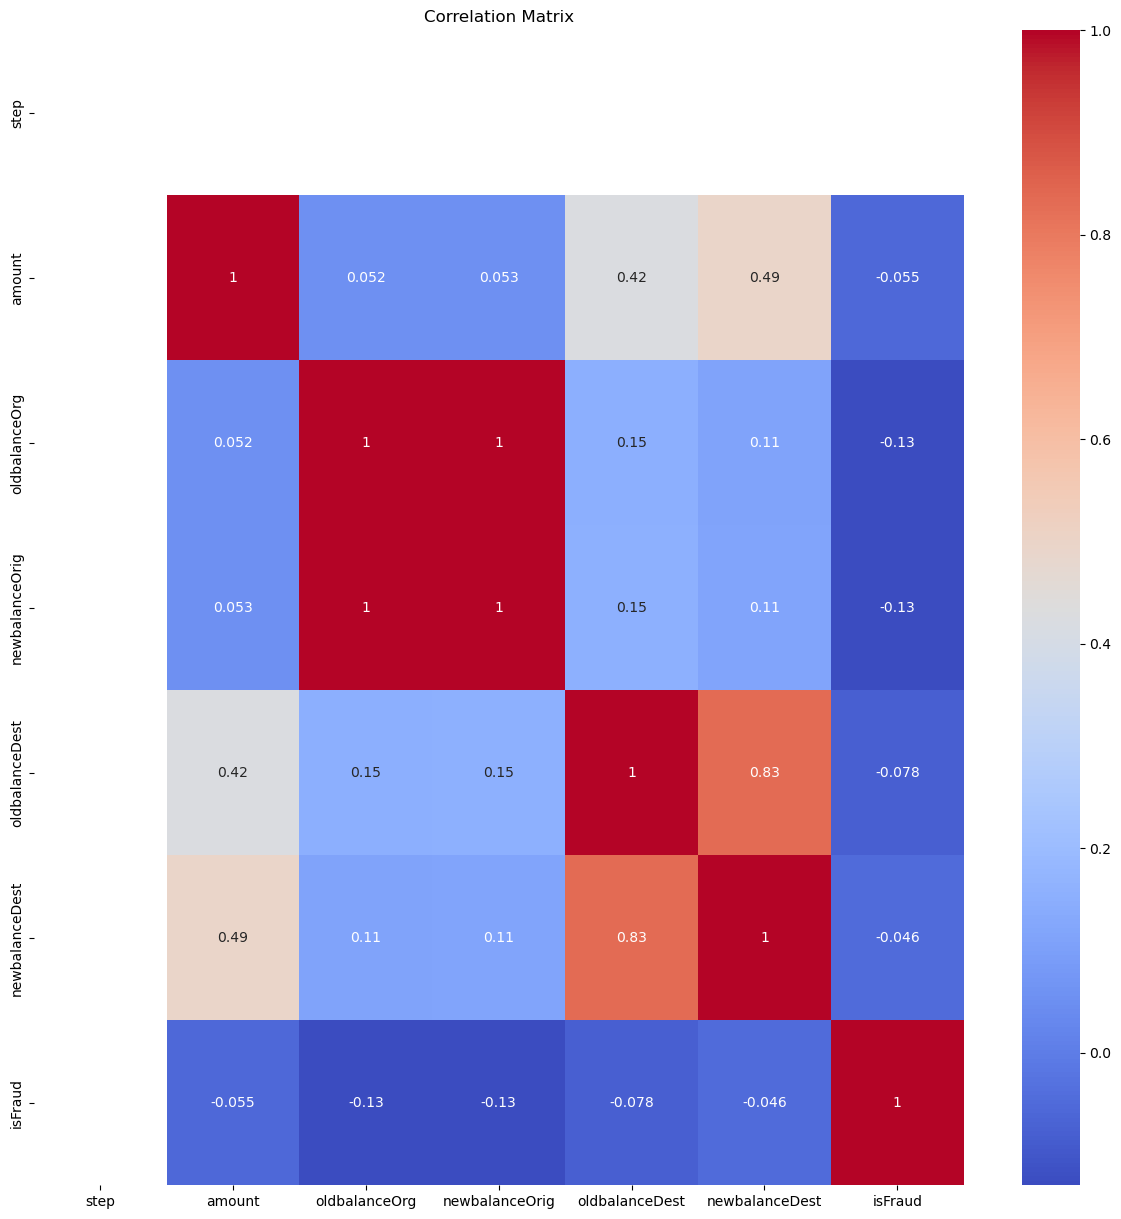

In [42]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
correlation = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


In [44]:
#creating dummy variables for categorical values
dum = pd.get_dummies(df['type'])
df1 = pd.concat([df,dum],axis=1)
df1.drop(['type'],axis=1, inplace=True)


isFraud
0    1339
1     161
Name: count, dtype: int64
Before OverSampling, counts of label '1': 107
Before OverSampling, counts of label '0': 943 

After OverSampling, the shape of train_X: (1886, 11)
After OverSampling, the shape of train_y: (1886,) 

After OverSampling, counts of label '1': 943
After OverSampling, counts of label '0': 943


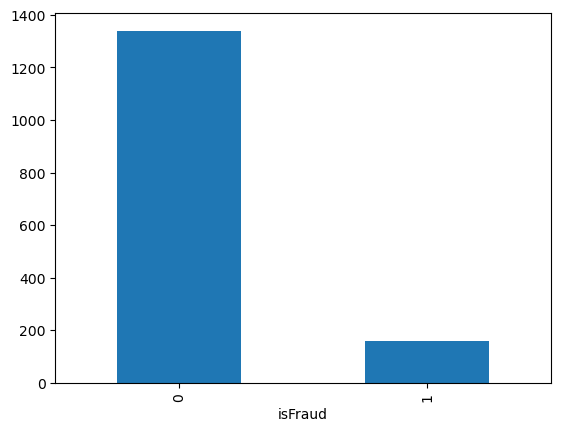

In [46]:
'''checking if target class is balanced or not'''

df2 = df1.sample(n=1500)
df2.isFraud.value_counts().plot.bar()
print(df2.isFraud.value_counts())

'''Splitting the data into training and test'''

X_train, X_test, y_train, y_test = train_test_split(df2.drop(['isFraud'],axis=1), df2['isFraud'], test_size=0.3, random_state=0)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

'''resampling the training data'''

sm = SMOTE(random_state=10, sampling_strategy = 1.0)
x_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


In [48]:
''' Feature scaling '''

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_res)
x_test_scaled = sc.transform(X_test)
X_test

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
778,1,2881.51,90250.00,87368.49,0.00,0.00,False,False,False,True,False
1020,1,2713.67,20210.00,17496.33,0.00,0.00,False,False,False,True,False
1336,1,4828.43,36736.58,31908.14,0.00,0.00,False,False,False,True,False
108,1,50101.88,0.00,0.00,67684.00,9940339.29,False,True,False,False,False
432,1,349505.89,7330235.59,7679741.48,17000998.23,19169204.93,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1468,1,9642.19,0.00,0.00,0.00,0.00,False,False,False,True,False
1200,1,424141.36,0.00,0.00,763134.49,1186556.81,False,False,False,False,True
897,1,327066.19,0.00,0.00,947614.29,3461666.05,False,True,False,False,False
1492,1,11679.19,30414.00,18734.81,0.00,0.00,False,False,False,True,False


In [50]:
print(x_test_scaled)

[[ 0.         -0.42111694 -0.23841959 ... -0.27208802  0.97279825
  -0.41491761]
 [ 0.         -0.42189234 -0.28238142 ... -0.27208802  0.97279825
  -0.41491761]
 [ 0.         -0.41212243 -0.27200822 ... -0.27208802  0.97279825
  -0.41491761]
 ...
 [ 0.          1.07657384 -0.29506658 ... -0.27208802 -1.02796238
  -0.41491761]
 [ 0.         -0.38047281 -0.2759767  ... -0.27208802  0.97279825
  -0.41491761]
 [ 0.         -0.02174709  0.29721837 ... -0.27208802 -1.02796238
  -0.41491761]]


# Applying Model

In [52]:
''' Initializing the model '''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

''' Adding the input layer and the first hidden layer '''

model.add(Dense(11, activation = 'relu'))

''' Adding the second hidden layer '''

model.add(Dense(7, activation = 'relu'))

''' Adding the output layer '''

model.add(Dense(1, activation = 'sigmoid'))

''' Compiling and fitting the model '''

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_info = model.fit(x_train_scaled, y_train_res, batch_size = 10, epochs  = 10)

''' Plotting the training curves '''

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # Accuracy plot
    axs[0].plot(range(1, len(model_history.history['accuracy']) + 1), model_history.history['accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(model_history.history['accuracy']) + 1, 1))  # Set ticks at every integer value
    axs[0].legend(['train'], loc='best')
    
    # Loss plot
    axs[1].plot(range(1, len(model_history.history['loss']) + 1), model_history.history['loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(model_history.history['loss']) + 1, 1))  # Set ticks at every integer value
    axs[1].legend(['loss'], loc='best')
    
    plt.show()

# Call the function to plot model history
plot_model_history(model_info)


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
''' Predicting the test results and '''

#y_pred = model.predict(x_test_scaled)
y_pred = (model.predict(x_test_scaled) > 0.5).astype("int32")
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy:',round(acc,2))

''' Generating the Confusion matrix and Classification report'''

print('Confusion matrix', '\n', confusion_matrix(y_test, y_pred), '\n')
print('Classification report', '\n', classification_report(y_test, y_pred), '\n')

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
import os


model.save('model.h5')



In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Function to get user input
def get_user_input():
    # Prompt the user for input features
    print("Please enter the following information:")
    type_input = input("Transaction Type (e.g., CASH_OUT, TRANSFER): ").strip().upper()
    amount = float(input("Transaction Amount: "))
    old_balance_dest = float(input("Old Balance Destination: "))
    new_balance_dest = float(input("New Balance Destination: "))
    # Add more input prompts for other features as needed
    
    # Create a DataFrame with the user input
    user_input_data = pd.DataFrame({
        'type': [type_input],
        'amount': [amount],
        'oldbalanceDest': [old_balance_dest],
        'newbalanceDest': [new_balance_dest],
        # Add more columns for other features and provide user input
    })

    return user_input_data

# Function to make predictions
def make_predictions(user_input_data, sc, model):
    # Preprocess user input (dummy variables for 'type' and scaling)
    dum = pd.get_dummies(user_input_data['type'])
    user_input_data = pd.concat([user_input_data, dum], axis=1)
    user_input_data.drop(['type'], axis=1, inplace=True)
    
    # Use the pre-defined StandardScaler 'sc' to transform user input data
    user_input_data_scaled = x_test_scaled
    # Use the trained model to make predictions
    fraud_probability = model.predict(user_input_data_scaled)[0,0]
    
    # Define a threshold for classification (e.g., 0.5)
    threshold = 0.5
    is_fraud = 1 if fraud_probability > threshold else 0
    
    return fraud_probability, is_fraud

# Load your pre-trained model and StandardScaler (replace these with your actual trained model and scaler)
# model = load_model('your_model.h5')
# sc = load_scaler('your_scaler.pkl')

# Get user input
user_input_data = get_user_input()

# Make predictions
fraud_probability, is_fraud = make_predictions(user_input_data, sc, model)

# Display the results
print(f"The predicted probability of fraud is: {fraud_probability:.4f}")
print(f"The predicted class (0 for non-fraud, 1 for fraud) is: {is_fraud}")


Please enter the following information:


NameError: name 'sc' is not defined

In [ ]:
# 5083.0	51513.44	

In [ ]:
# 1	PAYMENT	4098.78	C1026483832	503264	499165.22	M1635378213	0	0	1	1


In [ ]:
# Please enter the following information:
# Transaction Type (e.g., CASH_OUT, TRANSFER): PAYMENT
# Transaction Amount: 4024.36
# Old Balance Destination: 0.0
# New Balance Destination: 0.00
# The predicted probability of fraud is: 0.5263
# The predicted class (0 for non-fraud, 1 for fraud) is: 1

In [ ]:
# Please enter the following information:
# Transaction Type (e.g., CASH_OUT, TRANSFER): CASH_OUT
# Transaction Amount: 819819
# Old Balance Destination: 0.0
# New Balance Destination: 0.0
# The predicted probability of fraud is: 0.5263
# The predicted class (0 for non-fraud, 1 for fraud) is: 1

In [ ]:
# Please enter the following information:
# Transaction Type (e.g., CASH_OUT, TRANSFER): TRANSFER
# Transaction Amount: 181.00
# Old Balance Destination: 0.0
# New Balance Destination: 0.00
# The predicted probability of fraud is: 0.4941
# The predicted class (0 for non-fraud, 1 for fraud) is: 0

In [ ]:
# Transaction Type (e.g., CASH_OUT, TRANSFER):
# PAYMENT

# Transaction Amount:
# 7107.77

# Old Balance Destination:
# 0.0

# New Balance Destination:
# 0.0


In [ ]:
# Please enter the following information:
# Transaction Type (e.g., CASH_OUT, TRANSFER): TRANSFER
# Transaction Amount: 181.00
# Old Balance Destination: 1.2
# New Balance Destination: 21.2
# 15/15 [==============================] - 0s 2ms/step
# The predicted probability of fraud is: 0.5214
# The predicted class (0 for non-fraud, 1 for fraud) is: 1